In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [251]:
import src.utils.preprocessing as pre

In [252]:
data = pre.import_RFA()

print(data.shape)
data.head(5)

(198275, 7)


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ..."


In [253]:
votes = pd.DataFrame(data.groupby(by='TGT')['VOT'].agg('count'))
votes = votes.rename(columns={'VOT':'votes'})
#votes

data = data.merge(votes, how='left',on='TGT')
data

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3


In [254]:
print(f'We have data on {data['TGT'].nunique()} elections ranging from 2003 to 2013')

We have data on 3497 elections ranging from 2003 to 2013


In [255]:
print(type(data.YEA[0]))
data['YEA'] = data['YEA'].astype(int)
print(type(data.YEA[0]))

<class 'str'>
<class 'numpy.int32'>


# Vote Polarity

In [ ]:
#How many people interacted more than once with an election
print('Unique users who interacted with an election more than once: {}'.format(data.duplicated(subset = ['TGT','SRC']).sum()))
#How many people interacted more than once with an election and did not switch votes (at least once)
print('Unique Users who intereacted with an election more than once and did not change votes, at least once: {}'.format(data.duplicated(subset = ['TGT','SRC','VOT']).sum()))
#How many people interacted more than once with an election and did switch votes (at least once)
print('Unique users who intereacted with an election more than once and did change vote, at least once: {}'.format(data.duplicated(subset = ['TGT','SRC']).sum()-data.duplicated(subset = ['TGT','SRC','VOT']).sum()))

Unique users who interacted with an election more than once 9272
Unique Users who intereacted with an election more than once and did not change votes, at least once 6824
Unique users who intereacted with an election more than once and did change vote, at least once 2448


In [487]:
print('Multiple votes per election - Candidate History') 
# If you remove DAT below, Frequency is greater than 1 since, all dates are unique by definition --> summary of each votes
# If we keep DAT below, We can see voting patterns for each date (i.e. +,-,+,+)
data[data.duplicated(subset=['TGT','SRC'], keep=False)==True].groupby(['TGT','SRC'])[['TGT','SRC','YEA','VOT','RES','DAT','votes']].value_counts().head(25)

Multiple votes per election - Candidate History


TGT       SRC             YEA   VOT  RES  DAT                     votes
21655     Keeper76        2008  -1   -1   19:50, 19 March 2008    24       1
                                          22:53, 17 March 2008    24       1
23skidoo  Rogerd          2005   1    1   03:06, 6 October 2005   58       1
                                          06:19, 1 October 2005   58       1
28bytes   Aiken drum      2010   1   -1   23:44, 2 December 2010  188      1
                          2011   1    1   16:18, 7 June 2011      188      1
          Axl             2010   1   -1   11:03, 2 December 2010  188      1
                          2011   1    1   17:59, 7 June 2011      188      1
          Chaser          2010   1   -1   08:35, 2 December 2010  188      1
                          2011   1    1   03:00, 10 June 2011     188      1
          Dlohcierekim    2010   1   -1   05:07, 2 December 2010  188      1
                          2011   1    1   23:03, 7 June 2011      188      1
    

In [256]:
vote_polarity_abs = data.groupby(by='TGT')['VOT'].value_counts(normalize=False).unstack(fill_value=0)#.head(10)#.sort_values(by = 'SRC', ascending=False)
vote_polarity_abs = vote_polarity_abs.rename(columns={1:'pos', 0:'neu', -1:'neg'})

vote_polarity_abs


VOT,neg,neu,pos
TGT,,,
(aeropagitica),10,5,40
07bargem,6,0,0
1234r00t,6,0,0
168...,0,0,7
21655,18,2,4
...,...,...,...
zeuspitar,2,0,1
zhudyzhu,2,0,0
Ævar Arnfjörð Bjarmason,32,4,60


In [257]:
vote_polarity_pct = data.groupby(by='TGT')['VOT'].value_counts(normalize=True).unstack(fill_value=0)#.head(10)#.sort_values(by = 'SRC', ascending=False)
vote_polarity_pct = vote_polarity_pct.rename(columns={1:'pos_pct', 0:'neu_pct', -1:'neg_pct'})

vote_polarity_pct


VOT,neg_pct,neu_pct,pos_pct
TGT,,,
(aeropagitica),0.181818,0.090909,0.727273
07bargem,1.000000,0.000000,0.000000
1234r00t,1.000000,0.000000,0.000000
168...,0.000000,0.000000,1.000000
21655,0.750000,0.083333,0.166667
...,...,...,...
zeuspitar,0.666667,0.000000,0.333333
zhudyzhu,1.000000,0.000000,0.000000
Ævar Arnfjörð Bjarmason,0.333333,0.041667,0.625000


In [258]:
vote_polarity = pd.concat([vote_polarity_abs,vote_polarity_pct], axis=1)
vote_polarity

VOT,neg,neu,pos,neg_pct,neu_pct,pos_pct
TGT,,,,,,
(aeropagitica),10,5,40,0.181818,0.090909,0.727273
07bargem,6,0,0,1.000000,0.000000,0.000000
1234r00t,6,0,0,1.000000,0.000000,0.000000
168...,0,0,7,0.000000,0.000000,1.000000
21655,18,2,4,0.750000,0.083333,0.166667
...,...,...,...,...,...,...
zeuspitar,2,0,1,0.666667,0.000000,0.333333
zhudyzhu,2,0,0,1.000000,0.000000,0.000000
Ævar Arnfjörð Bjarmason,32,4,60,0.333333,0.041667,0.625000


In [259]:
data_vote_polarity = data.merge(vote_polarity, how='left', on='TGT')
data_vote_polarity

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes,neg,neu,pos,neg_pct,neu_pct,pos_pct
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137,14,4,119,0.10219,0.029197,0.868613
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137,14,4,119,0.10219,0.029197,0.868613
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137,14,4,119,0.10219,0.029197,0.868613
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137,14,4,119,0.10219,0.029197,0.868613
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137,14,4,119,0.10219,0.029197,0.868613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3,0,0,3,0.00000,0.000000,1.000000
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3,0,0,3,0.00000,0.000000,1.000000
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3,0,0,3,0.00000,0.000000,1.000000
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3,0,0,3,0.00000,0.000000,1.000000


# Pass Rate (Overall)

Text(0.5, 1.0, 'Percentage of Passed RFA overall')

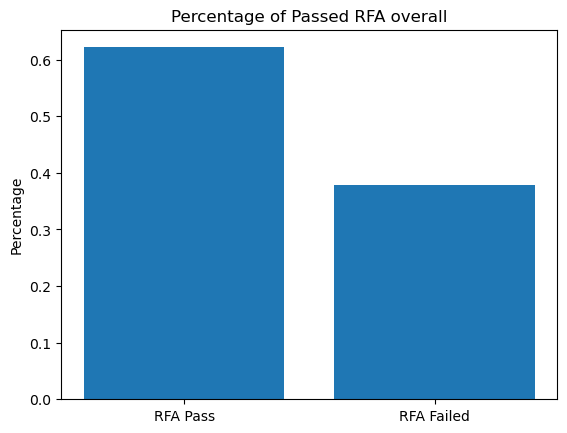

In [260]:
plt.bar(['RFA Pass','RFA Failed'],data_vote_polarity.RES.value_counts(normalize=True))
plt.ylabel('Percentage')
plt.title('Percentage of Passed RFA overall')

In [261]:
import plotly.io as pio
import plotly.tools as tls

In [262]:
fig, ax = plt.subplots()
bars = ax.bar(['RFA Pass','RFA Failed'],data_vote_polarity.RES.value_counts(normalize=True))
plt.ylabel('Percentage')
plt.title('Percentage of Passed RFA overall')
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/overall_pass_rate.html')

## Pass Rate by Year

In [263]:
data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0)

RES,-1,1
YEA,,
2003,0,203
2004,1440,5101
2005,4919,15320
2006,18361,26964
2007,15183,26358
2008,13237,17242
2009,9575,11800
2010,5287,8683
2011,2693,5863


In [264]:
data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)

RES,-1,1
YEA,,
2003,0.000000,1.000000
2004,0.220150,0.779850
2005,0.243046,0.756954
2006,0.405097,0.594903
2007,0.365494,0.634506
2008,0.434299,0.565701
2009,0.447953,0.552047
2010,0.378454,0.621546
2011,0.314750,0.685250


Text(0.5, 1.0, 'Evolution of Pass Rates and votes')

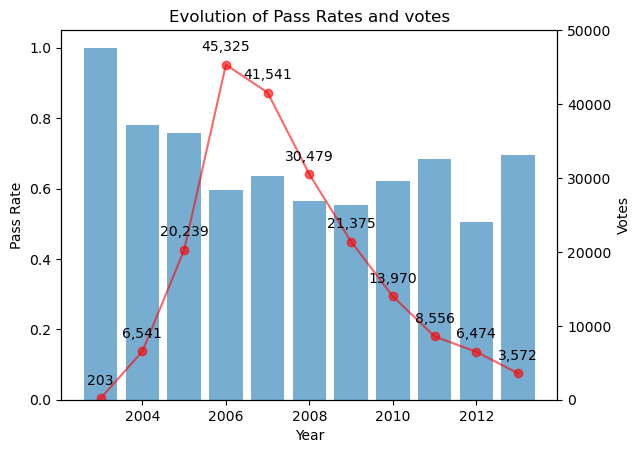

In [265]:
fig, ax1 = plt.subplots()

ax1.bar(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)[1], alpha=.6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Pass Rate')


ax2 = ax1.twinx()
ax2.plot(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1), color ='red', alpha=.6, marker= 'o')

ax2.set_ylim((0,50000))
ax2.set_ylabel('Votes')

# Add values to the percentage line plot
for i, txt in enumerate(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)):
    ax2.annotate(f"{txt:,}",  # Format the value to 2 decimal places
                 (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)[2003+i]),
                 textcoords="offset points",
                 xytext=(0, 10),  # Offset the text slightly above the point
                 ha='center', color='black')

plt.title('Evolution of Pass Rates and votes')

In [268]:
fig, ax1 = plt.subplots()

ax1.bar(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)[1], alpha=.6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Pass Rate')


ax2 = ax1.twinx()
ax2.plot(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1), color ='red', alpha=.6, marker= 'o')

ax2.set_ylim((0,50000))
ax2.set_ylabel('Votes')

# Add values to the percentage line plot
for i, txt in enumerate(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)):
    ax2.annotate(f"{txt:,}",  # Format the value to 2 decimal places
                 (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)[2003+i]),
                 textcoords="offset points",
                 xytext=(0, 10),  # Offset the text slightly above the point
                 ha='center', color='black')

plt.title('Evolution of Pass Rates and votes')
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/Evolution_of_Pass_Rates_and_votes.html')

c:\Users\mikai\anaconda3\Lib\site-packages\plotly\matplotlylib\renderer.py:645: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



Main Insights: 
- First year can be an anomaly since we don't have any negatives (may be an issue with the data) 
- 2004 onwards, pass rate is between 55% and 75% --> overall, chance of passing each year --> not really affected by growth in volume
- application volume increased till 2006; consistent decline since 2006 --> exponential growth and decline??? --> does wiki RFA have enough admins now?

Questions: 
- Does voter participation also increase over the years: total unique voters per year, elections voted per voter per year?
- should we drop 2003 year --> small sample and potentially tainted --> remove outliers

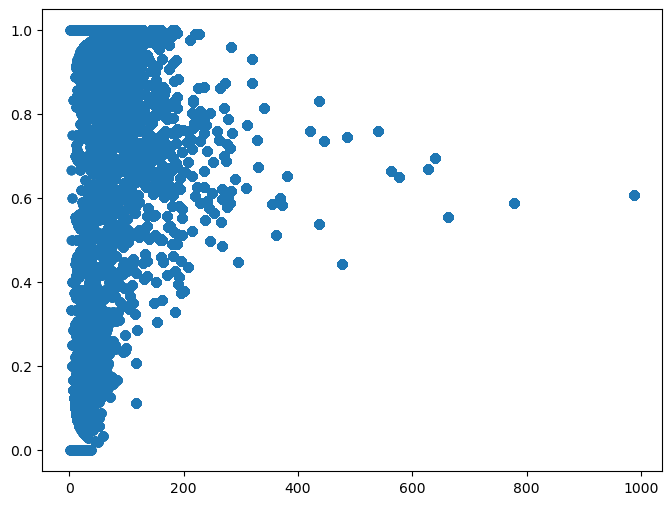

In [270]:
plt.figure(figsize=(8,6))
plt.scatter(data_vote_polarity.votes, data_vote_polarity.pos_pct)

#Zoom in to focus on 0 to 200 (97.5% of data)
#plt.xlim((0,200))




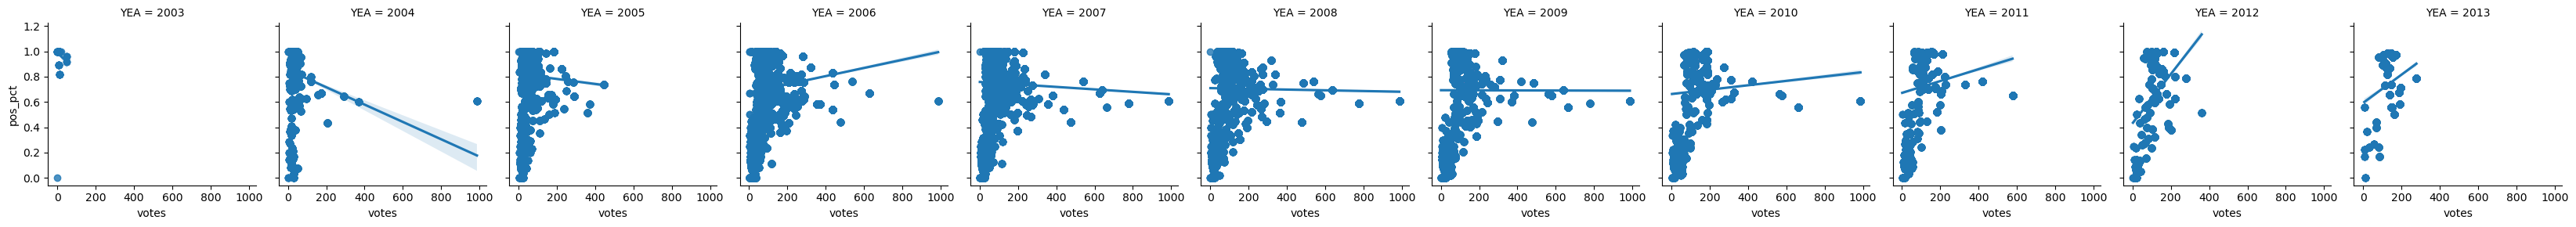

In [271]:
sns.FacetGrid(data_vote_polarity, col='YEA').map(sns.regplot, 'votes','pos_pct')

Text(40.35487499999999, 0.5, 'Income per Capita [$]')

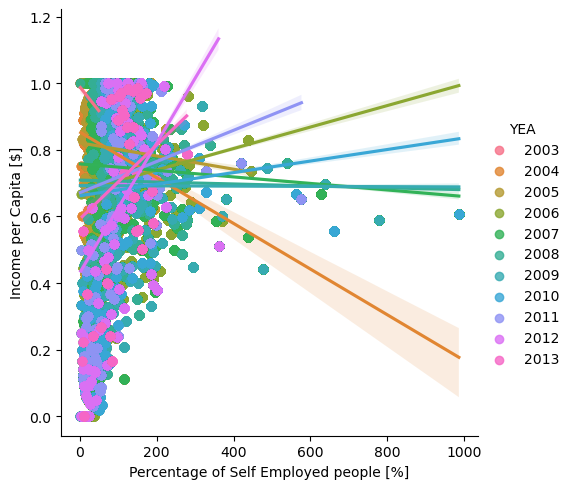

In [272]:
sns.lmplot(x='votes',y='pos_pct', data=data_vote_polarity, hue = 'YEA')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
#plt.ylim([10000,60000])
#plt.xlim([0,25])

In [273]:
plt.figure(figsize=(8,6))
plt.scatter(data_vote_polarity.votes, data_vote_polarity.pos_pct)

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/vote_polarity.html')

Tried to see if there's any trend for participants and pass rates --> do we see higher pass rates for elections with more votes or opposite

next steps:
- remove 2003 data since it is only positive?
- plot by year (subplots), add slopes to compare trends (if any)
- try standardizing data

## Pass Rate by Candidate

In [274]:
#How many candidates run only once (assuming candidates can only run once per year)
#Check if some elections happen across two years (i.e. Dec into Jan)
#Check if we have election id
#Numerator is for single year elections (proxy for one election candidates) from below
(702+681+489+410+274+240+152+100+79+55+28)/data_vote_polarity.groupby(['TGT'])['YEA'].unique().value_counts().sum()


0.9179296539891335

An overwhelming Majority of candidates only run once (92%) irrespective of outcome. 

In [275]:
data_vote_polarity.groupby(['TGT'])['YEA'].unique().value_counts().sort_values(ascending=False).head(20)

YEA
[2007]          702
[2006]          681
[2005]          489
[2008]          410
[2004]          274
[2009]          240
[2010]          152
[2011]          100
[2012]           79
[2003]           55
[2013]           28
[2010, 2009]      1
[2006, 2005]      1
[2006, 2005]      1
[2008, 2007]      1
[2008, 2007]      1
[2006, 2005]      1
[2007, 2006]      1
[2006, 2005]      1
[2010, 2009]      1
Name: count, dtype: int64

Next steps: Election statistics by attempts --> pass rate, votes per election, ability to pass second time, margin of loss of the first loss 
Observation: Candidates run on consecutive years, after failing first time

# Vote Distribution by Election

In [276]:
data_by_tgt = data.groupby(by='TGT').count().sort_values(by = 'SRC', ascending=False)
print(data_by_tgt.shape)
data_by_tgt.head(20)

(3497, 7)


,SRC,VOT,RES,YEA,DAT,TXT,votes
TGT,,,,,,,
Everyking,987,987,987,987,987,987,987
TenPoundHammer,778,778,778,778,778,778,778
MZMcBride,663,663,663,663,663,663,663
Cobi,639,639,639,639,639,639,639
Elonka,628,628,628,628,628,628,628
Ironholds,577,577,577,577,577,577,577
Kww,563,563,563,563,563,563,563
Werdna,540,540,540,540,540,540,540
Enigmaman,486,486,486,486,486,486,486


In [277]:
#To check vote counts above a certain threshold
data_by_tgt[data_by_tgt['SRC']>200].SRC.count()

91

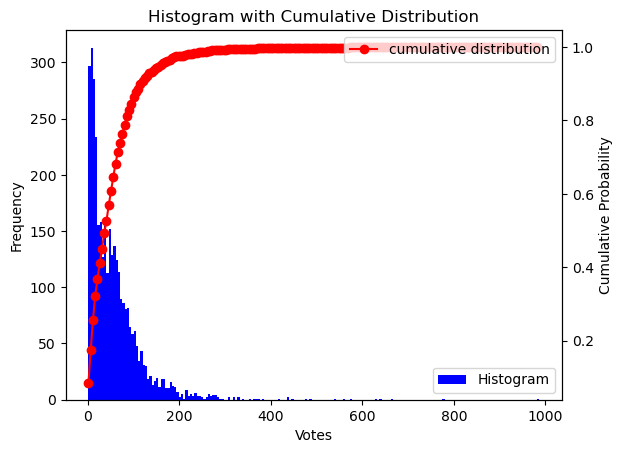

In [278]:
fig, ax1 = plt.subplots()

counts, bins, patches = ax1.hist(data_by_tgt.SRC, bins= 200, cumulative = False, color= 'blue', label = 'Histogram')

#ax1 = plt.hist(x = data_by_tgt.SRC, bins=200, cumulative=False, label='Histogram')
ax1.set_xlabel('Votes')
ax1.set_ylabel('Frequency')
ax1.legend(loc= 'lower right')

cumulative = np.cumsum(counts)
cumulative = cumulative / cumulative[-1]

ax2 = ax1.twinx()

ax2.plot(bins[:-1], cumulative, color ='red', marker='o', label = 'cumulative distribution')

ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc = 'upper right')

plt.title('Histogram with Cumulative Distribution') 
plt.show()

In [279]:
election_mean = data_by_tgt.SRC.mean()
election_median = data_by_tgt.SRC.median()
election_mode = data_by_tgt.sort_values('SRC', ascending=True).SRC.quantile(q=0.5)
election_quant_9 = data_by_tgt.sort_values('SRC', ascending=True).SRC.quantile(q=0.9)

print('Mean: {:.0f} \nMedian: {:.0f} \nMode: {:.0f} \n90th percentile: {:.0f}'.format(election_mean, election_median, election_mode,election_quant_9 ))


Mean: 57 
Median: 41 
Mode: 41 
90th percentile: 120


In [280]:
print('From above, we see that, on average, we have {:.1f} for an election.\
      \nHalf of our elections will have less than {:.0f} votes.\
      \nThe most frequent vote count for an election will be {:.0f} votes\
      \nWe can see that the 90% of the elections have less than {:.0f} votes.\
      '.format(election_mean, election_median, election_mode,election_quant_9))

From above, we see that, on average, we have 56.7 for an election.      
Half of our elections will have less than 41 votes.      
The most frequent vote count for an election will be 41 votes      
We can see that the 90% of the elections have less than 120 votes.      


# Comment Analysis 

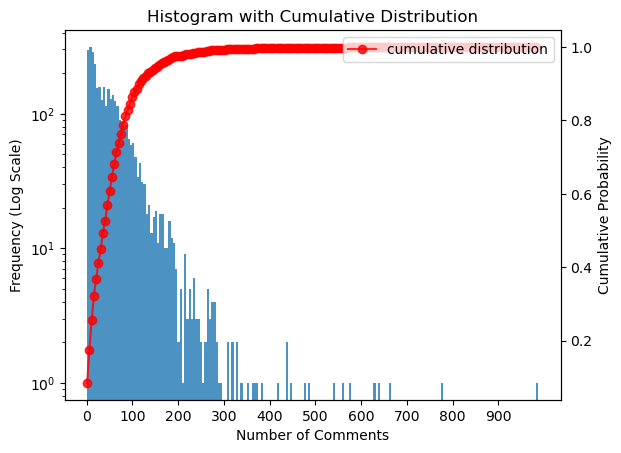

In [281]:
fig, ax1 = plt.subplots()

counts, bins, patches = ax1.hist(data_vote_polarity.groupby('TGT')['TXT'].count(), bins= 200, cumulative = False, log = True, alpha = 0.8)

#ax1 = plt.hist(x = data_by_tgt.SRC, bins=200, cumulative=False, label='Histogram')
ax1.set_xlabel('Number of Comments')
ax1.set_ylabel('Frequency (Log Scale)')
plt.xticks(range(0,1000,100))
#ax1.legend(loc= 'lower right')

cumulative = np.cumsum(counts)
cumulative = cumulative / cumulative[-1]

ax2 = ax1.twinx()

ax2.plot(bins[:-1], cumulative, color ='red', alpha= 0.8, marker='o', label = 'cumulative distribution')

ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc = 'upper right')

plt.title('Histogram with Cumulative Distribution') 
plt.show()

In the histogram, we can observe that the bulk of the mass located below 200, with a median around 50.

In [282]:
print('90th Percentile: {:.0f}'.format(data_vote_polarity.groupby('TGT')['TXT'].count().quantile(0.9)))
print('95th Percentile: {:.0f}'.format(data_vote_polarity.groupby('TGT')['TXT'].count().quantile(0.95)))
print('99th Percentile: {:.0f}'.format(data_vote_polarity.groupby('TGT')['TXT'].count().quantile(0.99)))

print('\nBehavior of below the 95th percentile (inclusive):')
print(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()<163+1].describe())

print('\nTail behavior beyond 99th percentile:')
print(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()>276].describe())

90th Percentile: 120
95th Percentile: 163
99th Percentile: 276

Behavior of below the 95th percentile (inclusive):
count    3322.000000
mean       46.756171
std        37.801955
min         1.000000
25%        14.000000
50%        39.000000
75%        70.000000
max       163.000000
Name: TXT, dtype: float64

Tail behavior beyond 99th percentile:
count     35.000000
mean     420.542857
std      164.334906
min      277.000000
25%      302.000000
50%      361.000000
75%      481.000000
max      987.000000
Name: TXT, dtype: float64


Using the first table, we can see that we have a relatively low median of 39 comments with half our elections having between 14 and 70 comments according to the IQR. 
At the lower end of the range, semantic analysis may be less insightful as we might not have sufficient comments with meaningful sentiment. However, a further analysis of this subset should inspect whether the less comments reflects the candidates compentency, i.e. less to discuss about strong candidates.

In [283]:
#Summ stats if we exclude 2003 bec
data_vote_polarity[~data_vote_polarity['YEA'].isin(['2003'])].groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()<163+1].describe()

#not much difference in IQR --> not from lack of data in 2003

count    3322.000000
mean       46.756171
std        37.801955
min         1.000000
25%        14.000000
50%        39.000000
75%        70.000000
max       163.000000
Name: TXT, dtype: float64

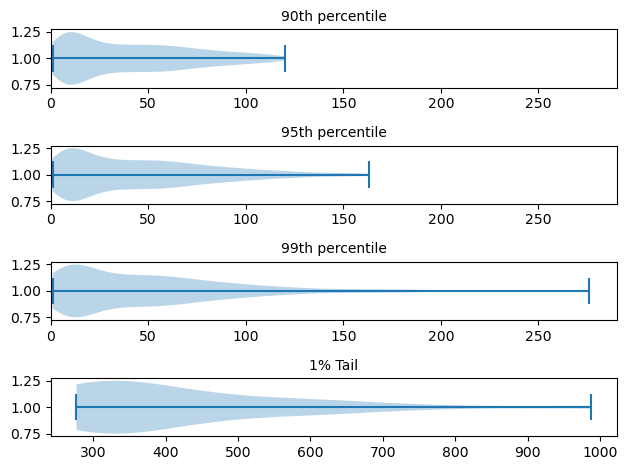

In [284]:
fig, axs = plt.subplots(4,1)

axs[0].violinplot(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()<120+1], vert = False)
axs[0].set_title('90th percentile', fontsize=10)
axs[0].set_xlim([0,290])

axs[1].violinplot(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()<163+1], vert = False)
axs[1].set_title('95th percentile', fontsize=10)
axs[1].set_xlim([0,290])

axs[2].violinplot(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()<276+1], vert = False)
axs[2].set_title('99th percentile', fontsize=10)
axs[2].set_xlim([0,290])

axs[3].violinplot(data_vote_polarity.groupby('TGT')['TXT'].count()[data_vote_polarity.groupby('TGT')['TXT'].count()>276], vert = False)
axs[3].set_title('1% Tail', fontsize=10)

plt.tight_layout()

We can see that distribution is positively skewed with 95% of the mass between 0 and 163 comments per election. There's a 

## by Year

In [404]:
vote_count = data.drop_duplicates(subset = ['TGT','YEA'], keep='first',ignore_index=True)


In [ ]:
#describes vote per election
vote_count.groupby('YEA')['votes'].describe()

,count,mean,std,min,25%,50%,75%,max
YEA,,,,,,,,
2003,58.0,5.379310,8.851261,1.0,1.00,3.0,5.75,49.0
2004,289.0,29.871972,65.873412,2.0,14.00,19.0,28.00,987.0
2005,543.0,45.965009,46.712087,1.0,22.00,33.0,54.00,445.0
2006,790.0,68.905063,75.056800,1.0,21.00,56.0,84.00,987.0
2007,820.0,63.835366,80.906938,1.0,16.00,48.0,76.00,987.0
2008,521.0,77.527831,98.078813,1.0,12.00,57.0,100.00,987.0
2009,319.0,93.122257,116.935722,1.0,12.00,74.0,118.50,987.0
2010,212.0,93.476415,114.102409,3.0,15.00,71.0,119.50,987.0
2011,134.0,80.544776,81.125042,1.0,16.25,77.5,106.75,577.0


In [417]:
data

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3


In [448]:
user_elec_particip = data.drop_duplicates(subset=['SRC','TGT','YEA','VOT']).groupby('SRC')['SRC'].value_counts().sort_values(ascending=False)
user_elec_particip.head()

SRC
Siva1979         1174
                 1100
Mailer diablo     975
Merovingian       883
Wizardman         779
Name: count, dtype: int64

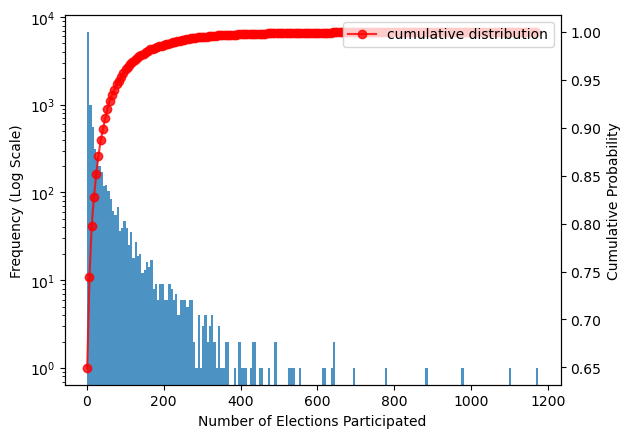

In [ ]:
fig, ax1 = plt.subplots()

counts, bins, patches = ax1.hist(user_elec_particip,
                                 bins= 200, cumulative = False, log = True, alpha = 0.8)

#ax1 = plt.hist(x = data_by_tgt.SRC, bins=200, cumulative=False, label='Histogram')
ax1.set_xlabel('Number of Elections Participated')
ax1.set_ylabel('Frequency (Log Scale)')
#plt.xticks(range(0,1000,100))
#ax1.legend(loc= 'lower right')

cumulative = np.cumsum(counts)
cumulative = cumulative / cumulative[-1]

ax2 = ax1.twinx()

ax2.plot(bins[:-1], cumulative, color ='red', alpha= 0.8, marker='o', label = 'cumulative distribution')

ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc = 'upper right')

In [453]:
print('90th percentile: {:.0f}'.format(user_elec_particip.quantile(0.90)))
print('90th percentile: {:.0f}'.format(user_elec_particip.quantile(0.95)))
print('90th percentile: {:.0f}'.format(user_elec_particip.quantile(0.99)))

90th percentile: 48
90th percentile: 90
90th percentile: 238


## Votes per Election + Comments + Unique Voters

In [454]:
data_vote_polarity

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes,neg,neu,pos,neg_pct,neu_pct,pos_pct
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137,14,4,119,0.10219,0.029197,0.868613
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137,14,4,119,0.10219,0.029197,0.868613
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137,14,4,119,0.10219,0.029197,0.868613
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137,14,4,119,0.10219,0.029197,0.868613
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137,14,4,119,0.10219,0.029197,0.868613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3,0,0,3,0.00000,0.000000,1.000000
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3,0,0,3,0.00000,0.000000,1.000000
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3,0,0,3,0.00000,0.000000,1.000000
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3,0,0,3,0.00000,0.000000,1.000000


# Notes 

## Notes on Dataset

- An election starting in Decemeber will continue in the following year --> Problems: 
    - election statistics by year are double-counting --> use start or final date to account --> Standardize dates to datetime?
- Voters can change votes --> need to adjust pass rates to only account for final voting intention
    - For prediction: How many votes change per election, and are they clustered (could be related to discussion) or random

section title if vote only correlate with own comments --> Grudge Match